<a href="https://colab.research.google.com/github/siddchauhan77/Datascience-Projects-Lab/blob/main/Classical_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstration of 11 different forecasting methods

1. Autoregression (AR)

2. Moving Average (MA)

3. Autoregressive Moving Average (ARMA)

4. Autoregressive Integrated Moving Average (ARIMA)

5. Seasonal Autoregressive Integrated Moving-Average (SARIMA)

6. Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

7. Vector Autoregression (VAR)

8. Vector Autoregression Moving-Average (VARMA)

9. Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)

10. Simple Exponential Smoothing (SES)

11. Holt Winter’s Exponential Smoothing (HWES)

- Source: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

- CSV Source: https://raw.githubusercontent.com/Kanbc/ar-model-python/master/data/daily-minimum-temperatures.csv

## Autoregression

In [ ]:
#AR 

from statsmodels.tsa.ar_model import AR
from random import random

In [ ]:
data = [x + random() for x in range(1, 100)]

model = AR(data)
model_fit = model.fit()

y_hat = model_fit.predict(len(data), len(data))

print(y_hat)

[100.19069416]


         date  temps
0  1981-01-01   20.7
1  1981-01-02   17.9
2  1981-01-03   18.8
3  1981-01-04   14.6
4  1981-01-05   15.8


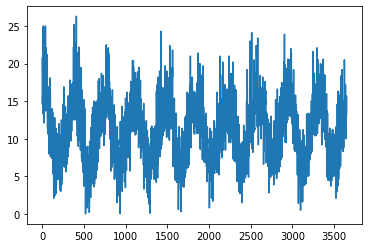

In [ ]:
import pandas as pd
from matplotlib import pyplot

df_AR = pd.read_csv('mintemps.csv')
df_AR.columns = ['date','temps']
df_AR['temps'].plot()
print(df_AR.head())

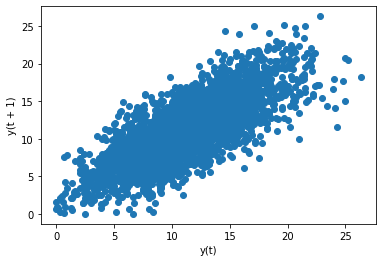

In [ ]:
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

lag_plot(df_AR['temps'])


### Auto Correlation Plots

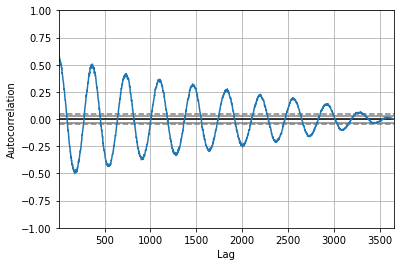

In [ ]:
autocorrelation_plot(df_AR['temps'])

In [ ]:
# lagged dataset

vals = pd.DataFrame(df_AR['temps'].values)
dataframe = pd.concat([vals.shift(1), vals], axis=1)
dataframe.columns = ['t-1','t+1']

### Persistence Model

Test MSE: 3.423


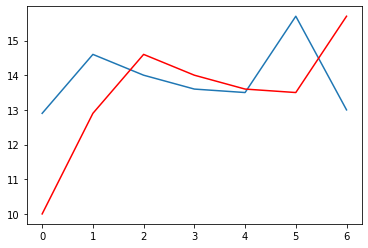

In [ ]:
# predict temps from last day temperatures
X = dataframe.values

train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]


from sklearn.metrics import mean_squared_error

# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
    
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
#running AR model

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
X = df_AR['temps'].values

Lag: 29
Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
Test MSE: 1.502


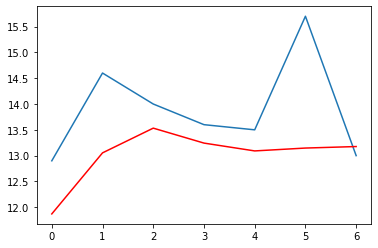

In [ ]:
train , test = X[1:len(X)-7], X[len(X)-7:len(X)]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
test_score = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

## Moving Average ( MA )

In [ ]:
# Note - This is different from MA smoothing. MA smoothing is used to eatimate the trend cycle of the past values. But MA model is used for forecasting

from statsmodels.tsa.arima_model import ARMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model. No AR, 1st order MA
model = ARMA(data, order=(0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[73.58380001]


### ARIMA

Stationary Time Series - One which does not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time. In general, a stationary time series will have no predictable patterns in the long-term.

Differencing - One way to make a non-stationary time series stationary — compute the differences between consecutive observations. This is known as differencing. Transformations such as logarithms can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

Note - We can also look at auto correlation function (ACF) plots. The ACF plots for non-stationary series drop slowly to zero, while those of stationary series will drop quickly!

- Alright, now that we have seen the math behind the model, let's see how to implement it. In Python we use ARIMA(p,d,q) function. We need to specify the value of p,d,q



In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

#dataset

data = [x + random() for x in range(1, 100)]

# fit model

model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)

# predict

yhat = model_fit.predict(len(data), typ='levels')
print(yhat)

[100.48620407]


### Steps involved in ARIMA modeling?


Steps Invoved in ARIMA Modeling?
EDA - Overview of whether data has seasonality or non-stationary, changing variance, etc.
Transformation - We can stabilize the variance by the box cox transformation (To obtain normal distrivution of constant variance. Say if we apply a logarithmic transformation, then difference between smaller values could be increased, while for larger values reduced. Increasing distance of left tail and reducing on right tail will make a right skewed distribution to ND.)
The Box-Cox power transformation searches from Lambda = -5 to Lamba = +5 until the best value is found to convert into ND. Some other transformation need to apply.

Check for non-stationary data - check by plotting or some statistical tests. If non-stationary data, then take differencing. NOTE - Random Walk is a non-stationary time series.
Examine ACF and PACF plots to find the order of ARIMA terms (p,q,d) - We can find the optimal order using some standard metrics (AIC). Least AIC scores will mean good predictions. These should be in a way that we get high accuracy of the predictions.
Check for residuals - Even if we are getting good accuracy, we need to plot the residuals. They should be white noise, i.e. Mean = 0 and Constant std. deviation. If this is not the case, i.e. there is some pattern in the residual it means we are missing some information in our predictions. Maybe sometime you might have to increase d to say 3rd differentiation. Keep on trying higher p and q.
Forecast

### How to determine order of ARIMA terms?

- ACF/PACF
- Model Fit
- Parsimony (AIC/BIC)
- ACF/PACF:


### How do you validate ARIMA?

- prediction accuracy
- diagnostic check for residuals

## SES Simple Exponentail Smoothing

- choose alpha and initialization

Coefficients are estimated by minimizing the SSE and putting constraints on Alpha. The constraint makes alpha range to be only between 0 to 1.

SES -> Does not account for seasonality and trends

In [ ]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

# contrived dataset
data = [x + random() for x in range(1, 100)]

# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data))


print(yhat)

[99.33013026]


## HWS method - Holt Winters' Seasonal Method

In [ ]:
# HWS method

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random

# contrived dataset
data = [x + random() for x in range(1, 100)]

# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data))

print(yhat)



[99.99742055]
